In [1]:
import pandas as pd
from pathlib import Path
from dotenv import dotenv_values
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = dotenv_values()["DATA_DIR"]
HF_TOKEN = dotenv_values()["HF_TOKEN"]

In [59]:
menusdf = pd.read_csv(Path(DATA_DIR) / "restaurant-menus.csv")
restaurantsdf = pd.read_csv(Path(DATA_DIR) / "restaurants.csv")

In [25]:
menusdf = menusdf[menusdf["description"].notnull()].copy()
menusdf.head()


,restaurant_id,category,name,description,price,category_num_tokens,name_num_tokens,description_num_tokens
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,3,4,2
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,3,3,2
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,3,3,2
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,3,6,2
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,3,4,2


In [5]:
menusdf.shape


(403240, 5)

In [6]:
1

1

## distribution of number of words in category, name, description

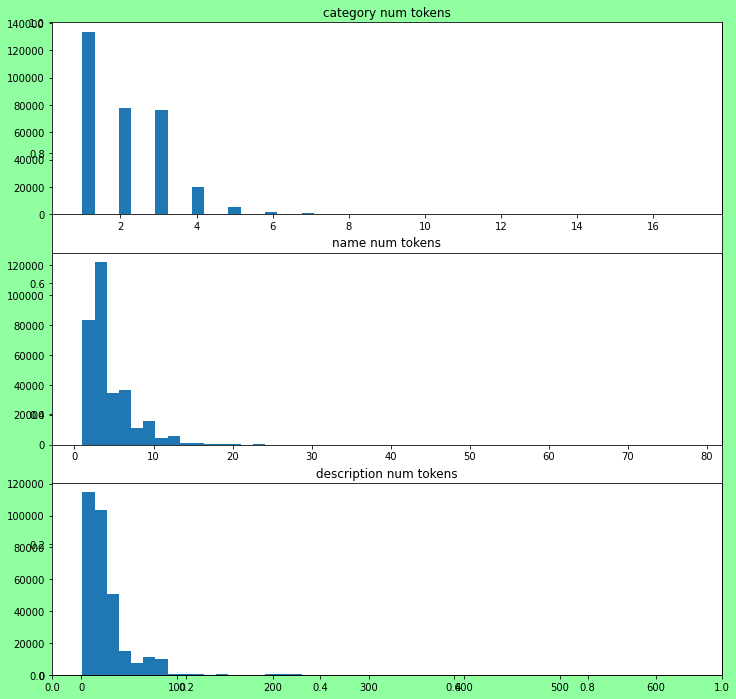

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
fig.patch.set_facecolor("xkcd:mint green")
for i, col in enumerate(["category", "name", "description"]):
    menusdf[col + "_num_tokens"] = menusdf[col].map(lambda x: len(x.split(" "))) #  if isinstance(x, str) else 0
    ax = fig.add_subplot(int(f"31{i + 1}"))
    
    ax.hist(menusdf[col + "_num_tokens"], bins=50)
    ax.set(title=f"{col} num tokens")

In [10]:
import random
i = random.randint(1, menusdf.shape[0])
menusdf.iloc[i: i + 10]

,restaurant_id,category,name,description,price,category_num_tokens,name_num_tokens,description_num_tokens
50463,688,Electronics & Office,JLab Audio Wireless Earbuds - 1.0 ea,JBUDS PRO WIRELESS SIGNATURE EARBUDS Ready to ...,31.48 USD,3,7,82
50464,688,Electronics & Office,Infinitive Micro SDHC Memory Card 32GB - 1.0 EA,Stores up to 600 Photos Stores up to 160 minut...,31.48 USD,3,9,60
50465,688,Pets,"PetShoppe Pet Waste Bags 9"" x 12"" - 135.0 ea",15 bags per roll 9 rolls per unit Made in CHINA,9.43 USD,1,10,11
50466,688,Pets,Blue Buffalo Health Bars with Apples & Yogurt ...,Tasty and healthy the perfect complement to yo...,8.17 USD,1,16,38
50467,688,Pets,Beggin Strips Dog Treats Bacon - 6.0 oz,Bacon flavored dog treats with real meat as th...,5.55 USD,1,8,86
50468,688,Pets,PetShoppe Nylon Dog Collar - 1.0 ea,Nylon dog collar for medium dogs. Medium breed...,6.28 USD,1,7,21
50469,688,Pets,PetShoppe Dog Training Pads - 50.0 ea,3.36 sq ft.(22 in X 22 in) Made in CHINA,28.33 USD,1,7,10
50470,688,Pets,Tidy Cats 24/7 Performance Cat Litter - 10.0 lb,"Your Pet, Our Passion. At our company we're un...",4.5 USD,1,9,77
50471,688,Pets,PetShoppe Long Leg Tug Dog Toy Assortment - 1....,Tug my legs. walgreens.com. Questions or comme...,7.33 USD,1,13,11
50472,688,Pets,Iams ProActive Health Cat Food Indoor Weight C...,Helps maintain healthy weight in indoor cats H...,11.53 USD,1,14,74


In [17]:
print(menusdf.category.unique().tolist()[:20])

['Extra Large Pizza', 'Jumbo Wings', 'Spicy Jumbo Wings', 'Chicken Tenders', 'Snacks', 'Candy', 'Pastries', 'Coffee', 'Energy', 'Juice', 'Soda', 'Tea', 'Water', 'Smoothies', 'Espresso Shots', 'Latte', 'Jtizpuccino', 'Teas', 'Desserts', 'Breakfast (All-Day)']


In [70]:
menusdf["concat"] = menusdf.apply(lambda x: f'{x["category"]} {x["name"]} {x["description"]}', axis=1)

In [27]:
menusdf[menusdf["name_num_tokens"] == 0].shape

(0, 8)

## Can we look at cos similarity between all pairs and look at the cos sim distribution 


In [33]:
from sentence_transformers import SentenceTransformer, util
from sentence_transformers.util import semantic_search, cos_sim
import torch

model_name = "all-MiniLM-L12-v2"
embedder = SentenceTransformer(
    #'msmarco-MiniLM-L-6-v3',
    model_name,
    use_auth_token=HF_TOKEN,
)

Signature: random.choices(population, weights=None, *, cum_weights=None, k=1)
Docstring:
Return a k sized list of population elements chosen with replacement.

If the relative weights or cumulative weights are not specified,
the selections are made with equal probability.
File:      ~/opt/miniconda3/envs/pandars310/lib/python3.10/random.py
Type:      method

In [42]:
import numpy as np
model = SentenceTransformer(model_name)
all_sentences = menusdf["concat"].tolist()
sentences = np.random.choice(all_sentences, size=1000, replace=False)
# Choose 1000 first try, 
paraphrases = util.paraphrase_mining(model, sentences)


In [44]:
paraphrases[0]

[1.0000003576278687, 633, 962]

In [50]:
for paraphrase in [row for row in paraphrases if row[0] < .95][:5]:
    score, i, j = paraphrase
    print("{} \n{} \n Score: {:.4f}\n\n".format(sentences[i], sentences[j], score))

Charbroiled Burgers Bacon &amp; Cheese Angus Burger Charbroiled Third Pound 100% black angus beef patty, crisp bacon, melted American cheese, tomato, lettuce, red onion, and mayonnaise, served on a potato bun.
 
Charbroiled Burgers Original Angus Burger Charbroiled Third Pound 100% Angus Beef, melted American cheese, lettuce, tomato, red onions, pickles, mustard, mayonnaise and ketchup, served on a potato bun.  
 Score: 0.9498


Fresh Melts® Ham &amp; Cheese Melt 6 Inch Melt Your cravings called, and we answered with melty goodness and fresh veggies, too. The Ham &amp; Cheese Melt combines Black Forest ham, fresh tomato and American cheese and grills them all up to create an indulgent choice that’s freshly made, too. 
Fresh Melts® Ham &amp; Cheese Melt Footlong Melt Your cravings called, and we answered with melty goodness and fresh veggies, too. The Ham &amp; Cheese Melt combines Black Forest ham, fresh tomato and American cheese and grills them all up to create an indulgent choice th

## maybe should only look for pairs perhaps with different restaurant ids ? 



In [67]:
restaurant_id_map = {i: x for i, x in enumerate(menusdf["restaurant_id"].tolist())}
list(restaurant_id_map.items())[:5]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [58]:
# paraphrases_with_restaurant_ids = [x for x in paraphrases ]
for paraphrase in [row for row in paraphrases 
                   if (row[0] < 1
                   and (restaurant_id_map[row[1]] != restaurant_id_map[row[2]])) 
                  ][:5]:
    score, i, j = paraphrase
    restaurant_id_1, restaurant_id_2 = (restaurant_id_map[i], restaurant_id_map[j])
    print(
        f"{sentences[i]} (restaurant={restaurant_id_1})\n{sentences[j]} (restaurant={restaurant_id_2})\n Score: {score:.4f}\n\n" 
    # .format(sentences[i], sentences[j], score)
         )

Breakfast Black Forest Ham, Egg &amp; Cheese Wrap Helllooo delicious! Enjoy a Spinach wrap filled with American cheese and a double portion of savory Black Forest ham and egg. What a tasty way to start the day! (restaurant=14)
Breakfast Black Forest Ham, Egg &amp; Cheese Wrap Helllooo delicious! Enjoy a Spinach wrap filled with American cheese and a double portion of savory Black Forest ham and egg. What a tasty way to start the day! (restaurant=20)
 Score: 1.0000


Specialties Black Bean Chalupa Supreme® A chewy chalupa shell filled with black beans, reduced-fat sour cream, lettuce, tomatoes, and three-cheese blend. (restaurant=1)
Specialties Black Bean Chalupa Supreme® A chewy chalupa shell filled with black beans, reduced-fat sour cream, lettuce, tomatoes, and three-cheese blend. (restaurant=12)
 Score: 1.0000


Allergy Season Claritin 24 Hour Allergy Relief Tablets - 30.0 ea Claritin√Ç¬Æ tablets provide powerful, 24 hour, non-drowsy relief of your worst indoor and outdoor allergy s

## hmm above did not quite work, 
maybe they are just different restaurants of same chain ? 

In [66]:
print(restaurantsdf.iloc[[20,22]][["id", "position", "name", "category"]])
print(restaurantsdf.iloc[[13, 15]][["id", "position", "name", "category"]])

    id  position                           name  \
20  21        43           Magic City Nutrition   
22  23        37  Golden Temple Vegetarian Cafe   

                                           category  
20  Juice and Smoothies, Bubble Tea, Healthy, Fruit  
22        Juice and Smoothies, Drinks, Comfort Food  
    id  position                                      name  \
13  14        51              Panera (521 Fieldstown Road)   
15  16        88  Jeni's Splendid Ice Cream (Pepper Place)   

                                             category  
13  Breakfast and Brunch, salad, Sandwich, Family ...  
15  Ice Cream &amp; Frozen Yogurt, Comfort Food, D...  


## Hmm ok but think  I have to save original row id actually because when I sampled, now that got changed. 


In [69]:
menusdf.iloc[0]

restaurant_id                          1
category               Extra Large Pizza
name             Extra Large Meat Lovers
description                   Whole pie.
price                          15.99 USD
Name: 0, dtype: object

In [71]:
sampledf = menusdf.sample(n=1000).reset_index()
restaurant_id_map = {i: x for i, x in enumerate(sampledf["restaurant_id"].tolist())}
list(restaurant_id_map.items())[:5]
all_sentences = menusdf["concat"].tolist()
# sentences = np.random.choice(all_sentences, size=1000, replace=False)
# Choose 1000 first try, 
# paraphrases = util.paraphrase_mining(model, sentences)
sentences[:5]

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
corpus = 
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

## Lets embed all the stuff and lets look at how they look within that 2d embedding space 
Lets use cohere and its dense retrieval 

In [9]:
import cohere
import umap
import altair as alt

In [10]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings


In [11]:
from jovyan_utils import umap_plot

In [12]:


corpus = ["Everybody Loves Raymond",
         "blood vessels go into a temporary spasm",
         "blocked flow of blood in fingers",
         "Everybody Loves Numbness",
         "Everybody Loves cold fingers",
         "Everybody Loves Reindeer",
         "Everybody Loves Riynudno"]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

query = "Everybody Loves Raynaud"
query_embedding = embedder.encode(query, convert_to_tensor=True)

cos_scores = cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=7)

cos_scores, top_results

print("Query:\n", query, "\n")

for score, idx in zip(top_results[0], top_results[1]):
    print(corpus[idx].strip(), "(Score: {:.4f})".format(score))


Query:
 Everybody Loves Raynaud 

Everybody Loves cold fingers (Score: 0.4929)
Everybody Loves Numbness (Score: 0.4379)
blocked flow of blood in fingers (Score: 0.4075)
Everybody Loves Riynudno (Score: 0.3814)
Everybody Loves Raymond (Score: 0.3706)
blood vessels go into a temporary spasm (Score: 0.3055)
Everybody Loves Reindeer (Score: 0.2809)


In [13]:
corpus_embeddings

tensor([[-0.0386, -0.0912, -0.0590,  ...,  0.0342,  0.0336, -0.0264],
        [-0.0397,  0.0058,  0.0856,  ...,  0.0248,  0.0532, -0.0036],
        [-0.0416, -0.0047,  0.0063,  ..., -0.0189, -0.0552,  0.0395],
        ...,
        [-0.1101, -0.0767, -0.0392,  ..., -0.0364, -0.0638,  0.0770],
        [-0.0927,  0.0005,  0.0201,  ..., -0.0289,  0.0254, -0.0414],
        [-0.1215, -0.1445, -0.0009,  ...,  0.0009,  0.0678, -0.0409]])

In [14]:
emb = corpus_embeddings.tolist()

In [ ]:
reducer = umap.UMAP(n_neighbors=2)
umap_embeds = reducer.fit_transform(emb)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
sentences = pd.DataFrame({"text": corpus})
chart = umap_plot(sentences, corpus_embeddings)
chart.interactive()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:
corpus_embeddings[:, :3]
